### code work on the google colab due to the limits of the memory and computational constraints

In [1]:
# Conect to the google drive
import os

from google.colab import drive
drive.mount('/content/drive')
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content'

### Update new version

In [2]:
# pip install opencv-contrib-python==4.5.1.48
!pip install opencv-contrib-python --upgrade

     |████████████████████████████████| 66.5 MB 151 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [2]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### To use pre-trained model download this

In [3]:
!git clone "https://github.com/fannymonori/TF-ESPCN.git"

Cloning into 'TF-ESPCN'...
remote: Enumerating objects: 150, done.
remote: Total 150 (delta 0), reused 0 (delta 0), pack-reused 150
Receiving objects: 100% (150/150), 9.73 MiB | 50.06 MiB/s, done.
Resolving deltas: 100% (23/23), done.


In [ ]:
!mkdir -p ./EEE6512_project/DOTA_data/project_dota_data
root_dir = '/content/drive/MyDrive/EEE6512_project'
nroot_dir = '/content/EEE6512_project/DOTA_data'
zip_data_root_dir = os.path.join(root_dir, 'DOTA_data')
extracted_data_root_dir = os.path.join(nroot_dir, 'project_dota_data')

### Make new folder

In [ ]:
!mkdir -p $extracted_data_root_dir/data/train
!mkdir -p $extracted_data_root_dir/data/val
!mkdir -p $extracted_data_root_dir/data/test

### Extract data from zip files

In [ ]:
!unzip -q -n $zip_data_root_dir/train/images/part1.zip -d $extracted_data_root_dir/data/train
!unzip -q -n $zip_data_root_dir/train/images/part2.zip -d $extracted_data_root_dir/data/train
!unzip -q -n $zip_data_root_dir/train/images/part3.zip -d $extracted_data_root_dir/data/train
!unzip -q -n $zip_data_root_dir/train/labelTxt-v1.0/Train_Task2_gt.zip -d $extracted_data_root_dir/data/train

!unzip -q -n $zip_data_root_dir/val/images/part1.zip -d $extracted_data_root_dir/data/val
!unzip -q -n $zip_data_root_dir/val/labelTxt-v1.0/Val_Task2_gt.zip -d $extracted_data_root_dir/data/val

!unzip -q -n $zip_data_root_dir/images/part1.zip -d $extracted_data_root_dir/data/test

In [ ]:
image_names_train = os.listdir("/content/EEE6512_project/DOTA_data/project_dota_data/data/train/images")

In [ ]:
image_names_val = os.listdir("/content/EEE6512_project/DOTA_data/project_dota_data/data/val/images")

In [ ]:
image_names_train2 = os.listdir("/content/drive/MyDrive/EEE6512_project/DOTA_data/upsampled_data/train/images")

In [ ]:
image_names_val2 = os.listdir("/content/drive/MyDrive/EEE6512_project/DOTA_data/upsampled_data/val/images")

In [ ]:
img = cv2.imread(f"/content/EEE6512_project/DOTA_data/project_dota_data/data/train/images/P0000.png")
# img = cv2.resize(img, (4000, 6000))

(5502, 3875, 3)

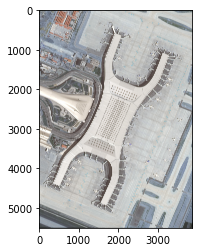

In [ ]:
plt.imshow(img)
img.shape

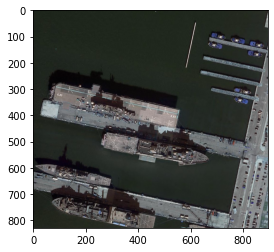

In [59]:
img = cv2.imread("/content/drive/MyDrive/EEE6512_project/DOTA_data/data/data/test/images/P0298.png")
plt.imshow(img)

### Upscaled train dataset using super-resolution ESPCN

In [ ]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()

path = "/content/TF-ESPCN/export/ESPCN_x2.pb"
sr.readModel(path)
sr.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA) # use GPU
sr.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA) # use GPU
sr.setModel("espcn",2)

errors = 0
for image_name in image_names_train:
    try:
        img = cv2.imread(f"/content/EEE6512_project/DOTA_data/project_dota_data/data/train/images/{image_name}")
        result = sr.upsample(img)
        cv2.imwrite(f"/content/drive/MyDrive/EEE6512_project/DOTA_data/upsampled_data/train/images/{image_name}", result)
    except:
        errors+=1
        pass

### Upscaled validation dataset using super-resolution ESPCN

In [ ]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()

path = "/content/TF-ESPCN/export/ESPCN_x2.pb"
sr.readModel(path)
sr.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
sr.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)
sr.setModel("espcn",2)

# path = "/content/EDSR_Tensorflow/models/EDSR_x4.pb"
# sr.readModel(path)
# sr.setModel("edsr",4)
errors = 0
for image_name in image_names_val:
    try:
        img = cv2.imread(f"/content/EEE6512_project/DOTA_data/project_dota_data/data/val/images/{image_name}")

        result = sr.upsample(img)
        cv2.imwrite(f"/content/drive/MyDrive/EEE6512_project/DOTA_data/upsampled_data/val/images/{image_name}", result)
    except:
        errors+=1
        pass

### Check the predictions

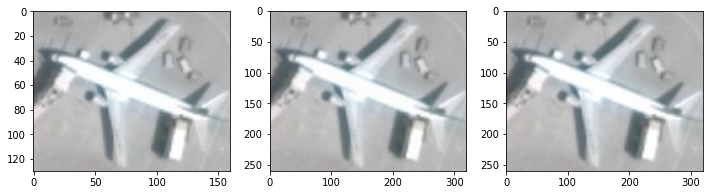

In [73]:
sr = cv2.dnn_superres.DnnSuperResImpl_create()

path = "/content/TF-ESPCN/export/ESPCN_x2.pb"
sr.readModel(path)
sr.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
sr.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)
sr.setModel("espcn",2)

# img = cv2.imread("/content/drive/MyDrive/EEE6512_project/DOTA_data/data/data/train/images/P0000.png")
# result = sr.upsample(img)
# resized = cv2.resize(img, dsize=None,fx=2,fy=2, interpolation = cv2.INTER_NEAREST)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
# plt.imshow(img[:,:,::-1])
# # Original image
plt.imshow(img[int(3930):int(4060),int(800):int(960),::-1])
plt.subplot(1,3,2)
# SR upscaled
plt.imshow(result[int(2*3930):int(2*4060),int(2*800):int(2*960),::-1])
plt.subplot(1,3,3)
# OpenCV upscaled
plt.imshow(resized[int(2*3930):int(2*4060),int(2*800):int(2*960),::-1])
plt.show()
